## BIA Tischi demo
BIA Tischi is a Jupyter-magic based assistant for interacting with data via code

In [1]:
import numpy as np
from bia_tischi import bob, xbob, cbob, vars, populate_next_cell
from bia_tischi._machinery import _context

%cbob hi, who are you?  

Initializing new AI assistant.
Agent and context initialised.


### Assistant's response

I am an AI model trained to assist with a variety of tasks, including writing, language translation, text summarization, and data analysis. How can I help you today?

### Additional information

The response did not contain any code.

In [2]:
%cbob write code to generate an image with noise

### Assistant's response

## Plan:
1. Import the necessary modules (numpy, matplotlib).
2. Create an image using numpy's randint function. This image will have values between 0 and 255 (the range for an 8-bit grayscale image) and size 512 X 512.
3. Generate noise using numpy's normal function. The scale parameter will be set to 20 to generate noise in the range -20 to +20.
4. Add the noise to the image, ensuring that the resulting image's values don't exceed the 0-255 range. This will be achieved using numpy's clip function.
5. Plot and display the image using matplotlib's imshow function.

### Additional information

The code was put into the next cell.  It is your responsibility to carefully check it beforeexecuting it!  

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Step 2
img_orig = np.random.randint(low=0, high=256, size=(512,512), dtype=np.uint8)

# Step 3
noise = np.random.normal(loc=0, scale=20, size=(512,512)).astype(np.int32)

# Step 4
img_noisy = np.clip(img_orig + noise, 0, 255).astype(np.uint8)

# Step 5
plt.imshow(img_noisy, cmap='gray')
plt.show()

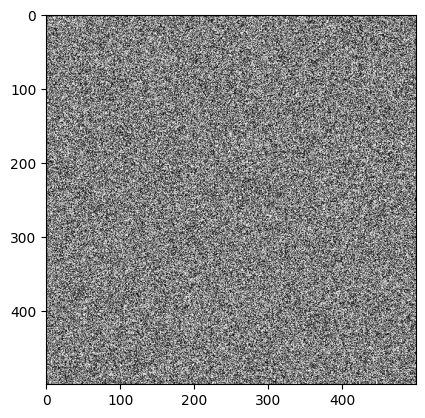

In [3]:
import matplotlib.pyplot as plt
from skimage import util
import numpy as np

size = 500 # define image size

# generate random image
image = np.random.random([size, size])

# add noise to image
noisy_image = util.random_noise(image, mode='gaussian')

# plot noisy image
plt.imshow(noisy_image, cmap='gray')
plt.show()

In [2]:
print('Hello World!')

Hello World!


In [5]:
%cbob please generate a grayscale image that contains 10 objects looking like nuclei with a radius of 20 pixels

Here is the step-by-step plan:

1. Import the necessary libraries - numpy, matplotlib and skimage
2. Create an empty 2D numpy array of zeros of size, 250x250 simulate a blank image.
3. Generate 10 random coordinates within the image boundary. Each coordinates will be used as the center for generating nuclei-like objects.
4. For each center point, use skimage's disk function to generate a disk of radius 20. This will give the effect of nuclei like round object.
5. Add these disks to the original image at the respective coordinates. 
6. Finally, display this image using matplotlib's imshow function. 

Now following is the python code for the steps mentioned in the plan.
--- end of plan

The code was put into the next cell.
It is your responsibility to carefully check it before executing it!


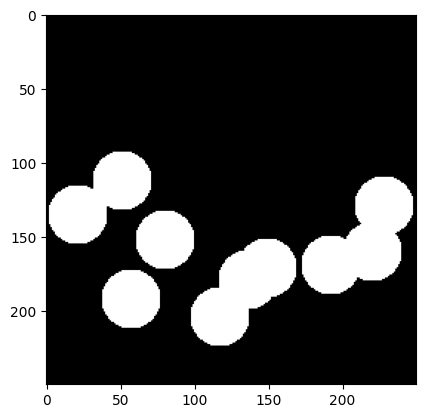

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import random 
from skimage.draw import disk

#Initial image of zeros of size 250x250
image = np.zeros((250, 250))

#To generate 10 nuclei, we'll loop 10 times
for _ in range(10):

    #generating random center for the nuclei
    x_center, y_center = np.random.randint(0, 230, 2)

    # Generate the coordinates for where this nucleus will go.
    rr, cc = disk((x_center, y_center), radius=20)

    # Add it to the image
    image[rr, cc] = 1 

plt.imshow(image, cmap='gray')
plt.show()